In [ ]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

height = np.array([156.00, 168.50, 155.00, 181.99,
          168.59, 184.36, 188.50, 176.76,
          164.73, 169.89, 169.77, 179.03,
          167.00, 173.00, 179.99, 169.55,
          172.55, 174.50, 167.25, 175.75,
          187.34, 191.26, 165.55, 181.40,
          175.00, 190.00, 181.15, 174.00,
          178.00, 167.90, 176.03])
month = np.array([10, 9, 9, 10, 5, 5, 7, 5,
         11, 6, 5, 1, 5, 12, 10, 6,
         12, 2, 2, 5, 5, 6, 5, 4,
         8, 2, 1, 4, 9, 11, 3])

In [ ]:
pd.DataFrame({'height':height, 'month':month})

,height,month
0,156.00,10
1,168.50,9
2,155.00,9
3,181.99,10
4,168.59,5
5,184.36,5
6,188.50,7
7,176.76,5
8,164.73,11
9,169.89,6


HEIGHT
Число групп:  6
Длина интервала: 6.043333333333332
Значения границ:  [151.97833333333332, 158.02166666666665, 164.06499999999997, 170.1083333333333, 176.1516666666666, 182.19499999999994, 188.23833333333326, 194.28166666666658]
Вариационный ряд:  [155.0, 156.0, 164.73, 165.55, 167.0, 167.25, 167.9, 168.5, 168.59, 169.55, 169.77, 169.89, 172.55, 173.0, 174.0, 174.5, 175.0, 175.75, 176.03, 176.76, 178.0, 179.03, 179.99, 181.15, 181.4, 181.99, 184.36, 187.34, 188.5, 190.0, 191.26]


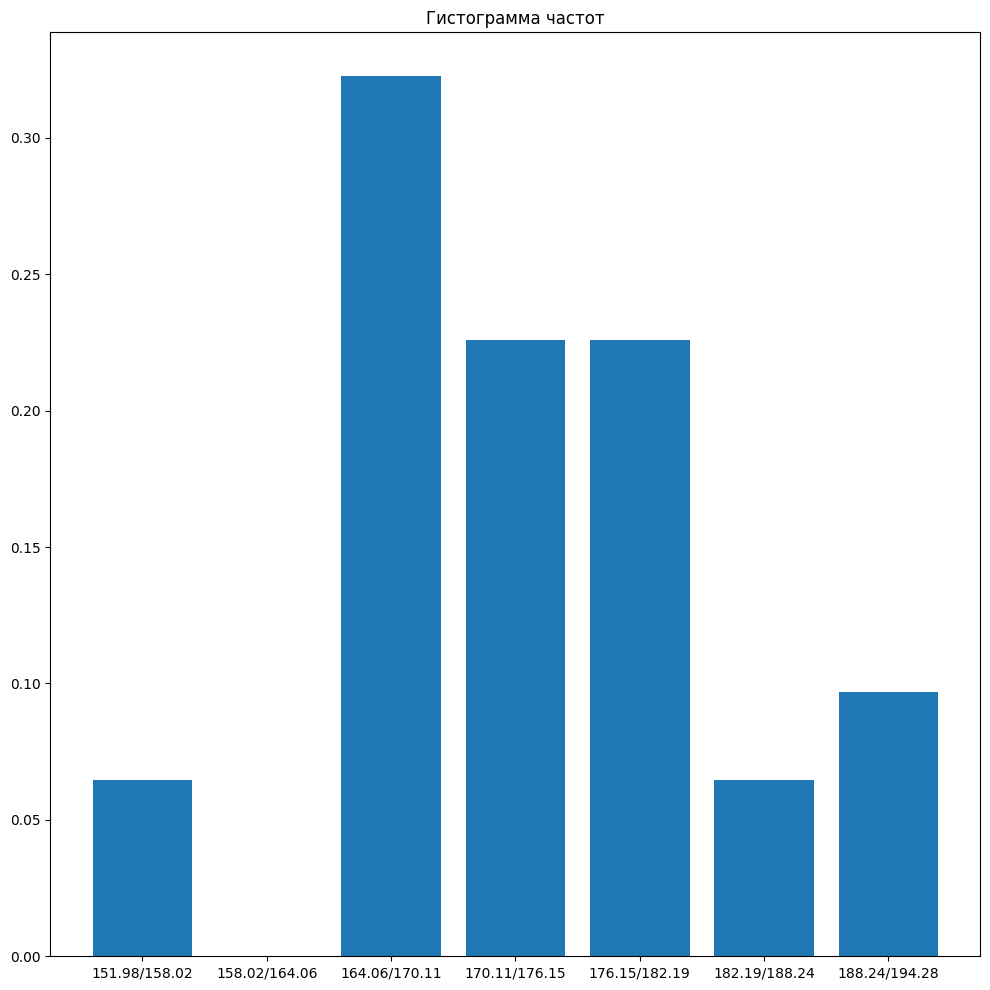

[0, 0.06451612903225806, 0.06451612903225806, 0.3870967741935484, 0.6129032258064516, 0.8387096774193549, 0.9032258064516129, 1.0]


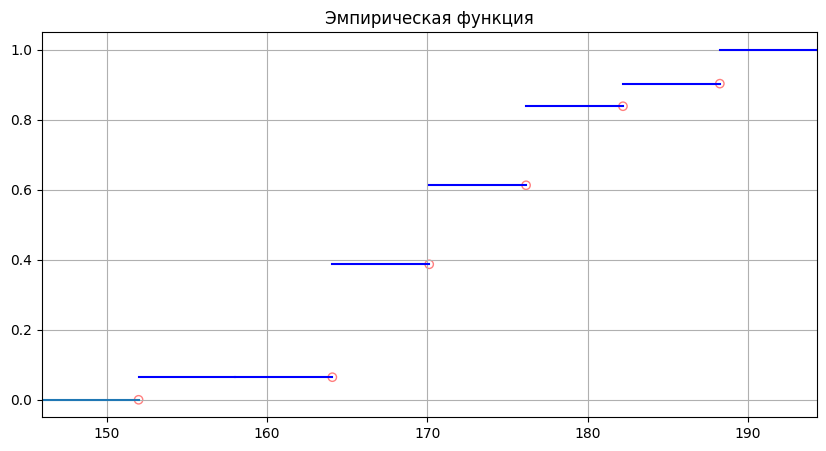

Выборочное среднее: 174.52709677419352
Выборочная дисперсия: 77.26131092611863
Выборочное стандартное отклонение: 8.789841348176804
Выборочная медиана: 174.5
Коэффициент вариации: 5.036376305250335
Интервал с медианой: 170.11/176.15
Модальный интервал: 164.06/170.11
Мода: 168.7137179487179


In [ ]:
plt.figure(figsize=(12, 12))
# Для роста (вещественные)
print("HEIGHT")

#рассчитать число групп
m = ceil(3.332 * log(len(height), 10)) + 1
print("Число групп: ", m)

#вычислить значения границ
h = (max(height) - min(height)) / m
print("Длина интервала:", h)
x = [min(height) - h / 2]
for i in range(m + 1):
  x.append(x[-1] + h)
print("Значения границ: ", x)

#построить вариационный ряд
height = sorted(height)
print("Вариационный ряд: ", height)

#построить гистограмму
plt.title("Гистограмма частот")
abs_freq = np.zeros(m + 1) # абсолютная частота
for i in height:
  j = 0
  while i > x[j + 1]:
    j += 1
  abs_freq[j] += 1

rel_freq = abs_freq / len(height) # относительная частота
x_labels = ["/".join([str(round(x[i], 2)), str(round(x[i + 1], 2))]) for i in range(len(x) - 1)]

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams['font.size'] = 10
plt.bar(x_labels, rel_freq)
plt.show()

#выписать выражение для эмпирической функции
plt.title("Эмпирическая функция")
plt.rcParams["figure.figsize"] = [15, 4]
emp_h = [0]
int_median = 0
for i in range(len(abs_freq)):
  emp_h.append(sum(abs_freq[:i+1]) / len(height))
  if emp_h[-1] > 0.5 and int_median == 0:
    int_median = x_labels[i]
print(emp_h)

scatter = {"x": [], "y": []}
plt.plot([0, x[0]], [emp_h[0], emp_h[0]])
for i in range(len(emp_h) - 1):
  plt.plot([x[i], x[i + 1]], [emp_h[i + 1], emp_h[i + 1]], color="blue")
  if emp_h[i + 1] != emp_h[i]:
    scatter["x"].append(x[i])
    scatter["y"].append(emp_h[i])
plt.plot([x[-1], x[-1] + h], [emp_h[-1], emp_h[-1]], color="blue")
plt.xlim([x[0] - h, x[-1]])
plt.scatter(scatter["x"], scatter["y"], facecolors="None", edgecolors='r', lw=1,alpha=0.5)
plt.grid()
plt.show()

#рассчитать статистики
print("Выборочное среднее:", np.mean(height))
print("Выборочная дисперсия:", np.var(height))
print("Выборочное стандартное отклонение:", np.std(height))
print("Выборочная медиана:", np.median(height))
print("Коэффициент вариации:", np.std(height) / np.mean(height) * 100)

#найти интервал, содержащий медиану
print("Интервал с медианой:", int_median)

#нати моду
index_mode = np.where(rel_freq == max(rel_freq))[0][0]
int_mode = x_labels[index_mode]
print("Модальный интервал:", int_mode)
rel_freq = rel_freq.tolist()
mode = x[index_mode] + h * (rel_freq[index_mode] - rel_freq[index_mode - 1]) / ((rel_freq[index_mode] - rel_freq[index_mode - 1]) + (rel_freq[index_mode] - rel_freq[index_mode + 1]))
print("Мода:", mode)

In [ ]:
pd.DataFrame({})

In [ ]:
s = 170.11 + h * (0.5 * len(height) - sum(abs_freq[:3])) / abs_freq[3]
s

173.1316666666667

MONTH
    month  abs_freq  rel_freq
1       1       2.0  0.064516
2       2       3.0  0.096774
3       3       1.0  0.032258
4       4       2.0  0.064516
5       5       8.0  0.258065
6       6       3.0  0.096774
7       7       1.0  0.032258
8       8       1.0  0.032258
9       9       3.0  0.096774
10     10       3.0  0.096774
11     11       2.0  0.064516
12     12       2.0  0.064516


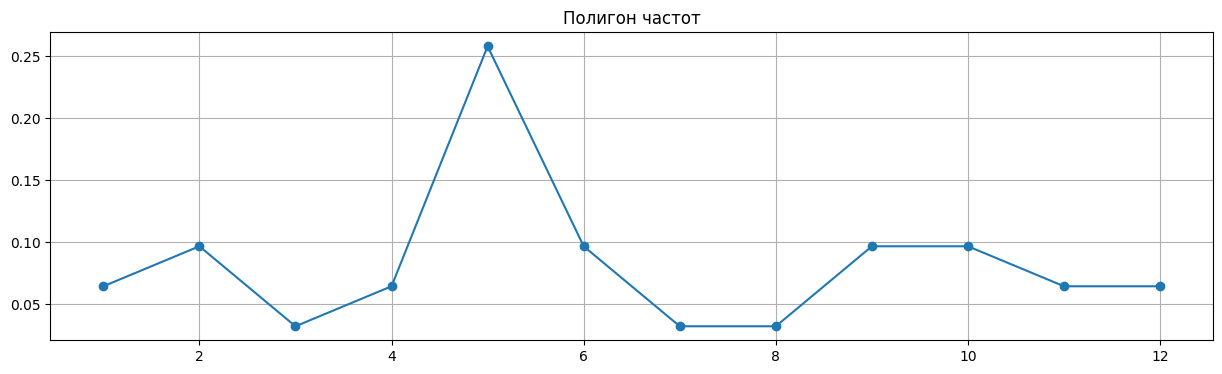

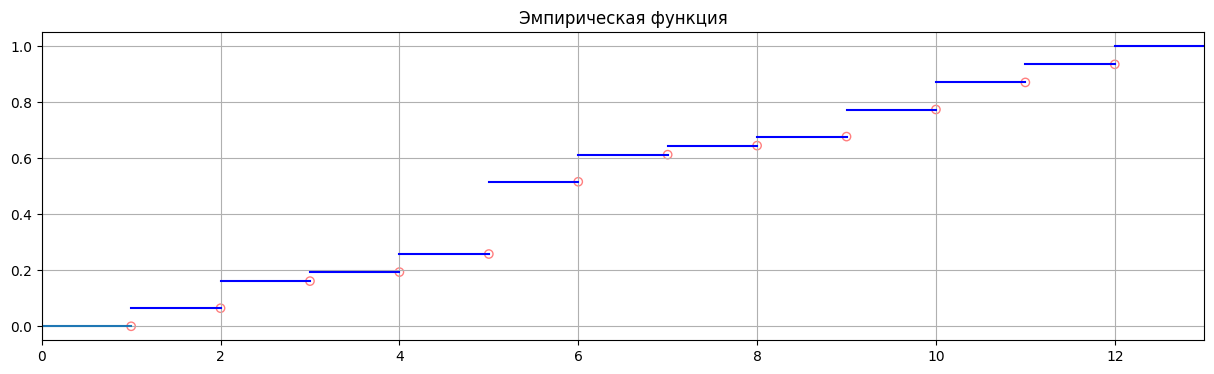

Выборочное среднее: 6.290322580645161
Выборочная дисперсия: 10.399583766909467
Выборочное стандартное отклонение: 3.224838564472564
Выборочная медиана: 5.0
Коэффициент вариации: 51.26666435828179
Мода: 5


In [ ]:

# Для месяцев (целые)
print("MONTH")

#построить вариационный ряд
month = np.sort(month)
freq = pd.DataFrame({"month":month, "abs_freq": np.ones(len(month))})

freq = freq.groupby(month, group_keys=False)
freq = freq.aggregate(np.sum)
freq.month = sorted(set(month))

rel_freq = np.array(freq.abs_freq) / len(month)

freq.insert(2, "rel_freq", rel_freq)
print(freq)

#построение полигона частот
plt.title("Полигон частот")
plt.plot(freq.rel_freq, marker='o')
plt.grid()
plt.show()

#выписать выражение для эмпирической функции
emp = [0]
for i in range(len(freq.abs_freq)):
  emp.append(sum(freq.abs_freq[:i+1]) / len(month))

set_m = sorted(set(month))
plt.plot([0, set_m[0]], [emp[0], emp[0]])
for i in range(len(emp) - 2):
  plt.plot([set_m[i], set_m[i + 1]], [emp[i + 1], emp[i + 1]], color="blue")
plt.plot([set_m[-1], set_m[-1] + 2], [emp[-1], emp[-1]], color="blue")
plt.scatter(set_m, emp[:-1], facecolors="None", edgecolors='r', lw=1,alpha=0.5)
plt.title("Эмпирическая функция")
plt.xlim([0, set_m[-1] + 1])
plt.grid()
plt.show()

#рассчитать статистики
print("Выборочное среднее:", np.mean(month))
print("Выборочная дисперсия:", np.var(month))
print("Выборочное стандартное отклонение:", np.std(month))
print("Выборочная медиана:", np.median(month))
print("Коэффициент вариации:", np.std(month) / np.mean(month) * 100) # >10, следовательно выборка некомпактная

print("Мода:", int(freq[freq.abs_freq == max(freq.abs_freq)].month))